<a href="https://colab.research.google.com/github/njafarov/Optimization_Python/blob/main/Traveling_Salesman_Problem_(NN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
network = {(1,1):0,(1,2):10,(1,3):10.8,(1,4):6.3,(1,5):13,(1,6):13.4,(1,7):16.4,(1,8):5.1,(1,9):6.4,(1,10):8.2,(1,'DC'):7.1,
           (2,1):10,(2,2):0,(2,3):7.1,(2,4):10.6,(2,5):3.6,(2,6):5.4,(2,7):9.5,(2,8):5.4,(2,9):7.2,(2,10):10.6,(2,"DC"):3,
           (3,1):10.8,(3,2):7.1,(3,3):0,(3,4):7,(3,5):6.4,(3,6):12.4,(3,7):16.5,(3,8):6.4,(3,9):12.1,(3,10):15.7,(3,"DC"):7.3,
           (4,1):6.3,(4,2):10.6,(4,3):7,(4,4):0,(4,5):12.1,(4,6):15.6,(4,7):19.4,(4,8):5.8,(4,9):11.2,(4,10):14,(4,"DC"):8.6,
           (5,1):13,(5,2):3.6,(5,3):6.4,(5,4):12.1,(5,5):0,(5,6):7.1,(5,7):11,(5,8):8,(5,9):10.8,(5,10):14.2,(5,"DC"):6.3,
           (6,1):13.4,(6,2):5.4,(6,3):12.4,(6,4):15.6,(6,5):7.1,(6,6):0,(6,7):4.1,(6,8):9.9,(6,9):8.1,(6,10):10.2,(6,"DC"):7.1,
           (7,1):16.4,(7,2):9.5,(7,3):16.5,(7,4):19.4,(7,5):11,(7,6):4.1,(7,7):0,(7,8):13.6,(7,9):10.3,(7,10):11.2,(7,"DC"):10.8,
           (8,1):5.1,(8,2):5.4,(8,3):6.4,(8,4):5.8,(8,5):8,(8,6):9.9,(8,7):13.6,(8,8):0,(8,9):6.1,(8,10):9.5,(8,"DC"):2.8,
           (9,1):6.4,(9,2):7.2,(9,3):12.1,(9,4):11.2,(9,5):10.8,(9,6):8.1,(9,7):10.3,(9,8):6.1,(9,9):0,(9,10):3.6,(9,"DC"):5,
           (10,1):8.2,(10,2):10.6,(10,3):15.7,(10,4):14,(10,5):14.2,(10,6):10.2,(10,7):11.2,(10,8):9.5,(10,9):3.6,(10,10):0,(10,"DC"):8.6,
           ("DC",1):7.1,("DC",2):3,("DC",3):7.3,("DC",4):8.6,("DC",5):6.3,("DC",6):7.1,("DC",7):10.8,("DC",8):2.8,("DC",9):5,("DC",10):8.6,("DC","DC"):0}

In [5]:
coordinates = {1:[3,9],2:[13,10],3:[12,3],4:[5,3],5:[16,8],6:[15,15],7:[16,19],8:[7,8],9:[6.5,14],10:[5,17],"DC":[10,10]}

In [6]:
for i in coordinates:
  coordinates[i][0]=coordinates[i][0]-10
  coordinates[i][1]=coordinates[i][1]-10
print(coordinates)

{1: [-7, -1], 2: [3, 0], 3: [2, -7], 4: [-5, -7], 5: [6, -2], 6: [5, 5], 7: [6, 9], 8: [-3, -2], 9: [-3.5, 4], 10: [-5, 7], 'DC': [0, 0]}


In [7]:
my_list = []
for i in network:
  if network[i] ==0:
    my_list.append(i)
print(my_list)

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), ('DC', 'DC')]


In [11]:
from typing_extensions import final
def salesman(network, coordinates):
  results = {}
  n = len(my_list)
  final_results = []
  
  for i in my_list:
    
    sec_list = []
    first_list = {}
    if i not in sec_list:
      sec_list.append(i)
      for j in network:
        
        if sec_list[-1][1]==j[0] and j not in sec_list and j[::-1] not in sec_list:
          first_list[j]=network[j]
          first_list = {k:i for k,i in sorted(first_list.items(), key=lambda item: item[1])}
      sec_list.append(list(first_list)[0])
      
      for t in range(n-len(sec_list)):
        third_list = {}
        for j in network:
          if sec_list[-1][1]==j[0]and j not in my_list and j not in sec_list and j[::-1] not in sec_list:
            third_list[j]=network[j]   
            third_list = {k:i for k,i in sorted(third_list.items(), key=lambda item: item[1])}
            for b in list(third_list):
              for m in sec_list:
                if b[1]==m[1]:
                  third_list.pop(b)
                  third_list = {k:i for k,i in sorted(third_list.items(), key=lambda item: item[1])}              
      

        sec_list.append(list(third_list)[0])
      for j in network:
          if sec_list[0][0]==j[1] and sec_list[-1][1]==j[0] and j!=sec_list[0]:
            sec_list.append(j) 
      
 # Adding  2-Opt Heuristic
      # for i in sec_list:
      #   for j in sec_list:
      #     for x in network:
      #       for y in network:
      #         if network[x]>0 and network[y]>0 and x not in sec_list and y not in sec_list and i[0]==x[1] and i[1]==y[1] and j[0]==x[0] and j[1]==y[1] and network[i]+network[j]>network[x]+network[y]:
      #           #print("X: ",x,"Y: ",y)
      #           sec_list.append(x)
      #           sec_list.append(y)
      #           sec_list.remove(j)
      #           sec_list.remove(i)


    #print("Sec List: ", sec_list)
    sum_list = []
    for l in sec_list:
      sum_list.append(network[l])
      final_result = sum(sum_list)
      #print("Final_result: ", final_result)
      results[tuple(sec_list)]= final_result
      results = {k:i for k,i in sorted(results.items(), key=lambda item: item[1])}
      

  final_results=list(results)[0]    
  print("Results: ", final_results)
  #print("Results: ", results)
  print("Optimal distance: ",round(results[list(results)[0]],2))
  
  x=[]
  y=[]
  text=[]
  
  for i in final_results:
    # print("I: ",i[1])
    # print("Coordinates: ",coordinates[i[1]][0])
    x.append(list(coordinates[i[1]])[0])
    y.append(list(coordinates[i[1]])[1])
    text.append(i[1])
  s = [400 if i == text[0] else 100 for i in text]
  plt.figure(figsize=(15,10))
  sns.scatterplot(data=coordinates, x=x, y=y,s=s)
  plt.title("Traveling Salesman Problem",size=20)
  
  
  i = 0
  while i < len(text) - 1:
    i += 1
    plt.plot(x, y, 'r')
    
    plt.text(x=x[i]+0.3,y=y[i]+0.3,s=text[i],
           fontdict=dict(size=10))  

Results:  ((10, 10), (10, 9), (9, 'DC'), ('DC', 8), (8, 1), (1, 4), (4, 3), (3, 5), (5, 2), (2, 6), (6, 7), (7, 10))
Optimal distance:  60.5


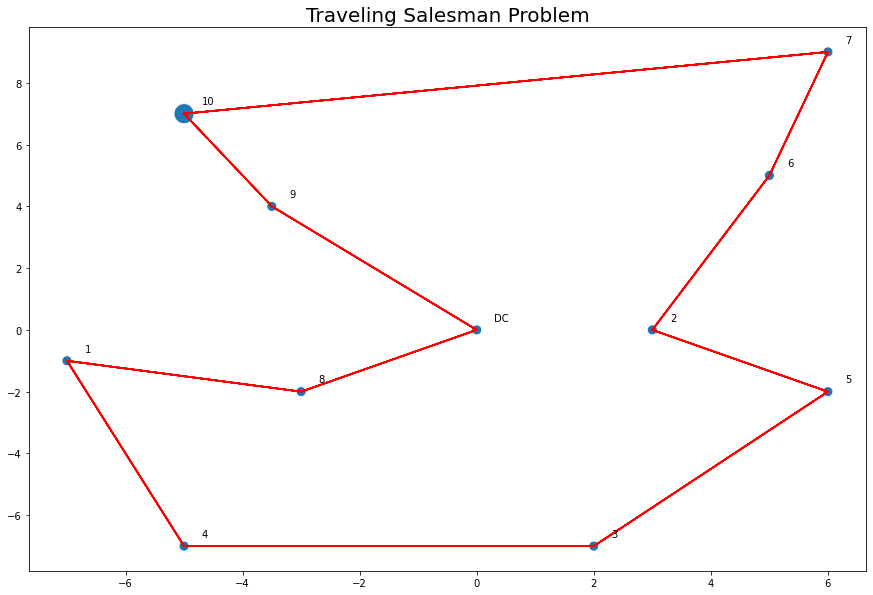

In [12]:
salesman(network, coordinates)